In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx #conda install networkx to do
import igraph as ig #à installer
import leidenalg as la #à installer

In [2]:
df = pd.read_csv('wiki-RFA.csv', index_col=0, parse_dates=['Date'])
df

,Source,Target,Vote,Results,Year,Date,Comment
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit..."
...,...,...,...,...,...,...,...
198067,Netoholic,Yelyos,-1,-1,2004,NaT,NaN
198068,Wolfman,Yelyos,-1,-1,2004,2004-11-19 16:05:00,Would support after a bit more editing work
198069,Tuomas,Yelyos,-1,-1,2004,2004-11-20 15:24:00,The exact number of edits ought to be no obsta...
198070,Improv,Yelyos,-1,-1,2004,2004-11-20 19:51:00,Not enough edits. Edits are ''necessary but no...


Louvain or Leiden algo (improvement of Louvain) = https://www.nature.com/articles/s41598-019-41695-z
 
--> "Louvain algorithm has a major problem, for both modularity and CPM. The algorithm may yield arbitrarily badly connected communities, over and above the well-known issue of the resolution limit14. Communities may even be internally disconnected."

--> Implémentation: https://readthedocs.org/projects/leidenalg/downloads/pdf/latest/

## Louvain algo

In [109]:
def compute_com_size(community_list):
    community_size=np.zeros(len(community_list), dtype=int)
    for n, com in enumerate(community_list):
        community_size[n]=len(com)
    return(community_size)

In [105]:
def extract_community_louvain(df, year, vote):
    #Data, Year, type of vote (-1,0,1) for negative, positive or neutral respectively required
    df_year=df[df['Year']==year]
    df_year_vote=df_year[df_year['Vote']==vote]
    df_year_vote=df_year_vote[['Source', 'Target']]

    #create the network
    G=nx.from_pandas_edgelist(df_year_vote, source='Source', target='Target')
    #extract communities with Louvain algorithm 
    G_community=nx.community.louvain_communities(G, seed=1234)
    
    return G_community

In [111]:
#create the dataframe
columns = ['Year', 'Vote', 'Total nbr of community', 'Size of each community', 'Community members']
df_community=pd.DataFrame(columns=columns)

years=df['Year'].unique()
for n, year in enumerate(years):
    G_community_pos=extract_community_louvain(df, year,1)
    size_communities_pos=compute_com_size(G_community_pos)
    df_community.loc[3*n]=[year, 1, len(size_communities_pos), size_communities_pos, G_community_pos]

    G_community_neg=extract_community_louvain(df, year,-1)
    size_communities_neg=compute_com_size(G_community_neg)
    df_community.loc[3*n+1]=[year, -1, len(size_communities_neg), size_communities_neg, G_community_neg]

    G_community_neu=extract_community_louvain(df, year,0)
    size_communities_neu=compute_com_size(G_community_neu)
    df_community.loc[3*n+2]=[year, 0, len(size_communities_neu), size_communities_neu, G_community_neu]

df_community


,Year,Vote,Total nbr of community,Size of each community,Community members
0,2013,1,9,"[57, 35, 131, 67, 153, 96, 62, 3, 105]","[{Retrolord, LlamaAl, Trevj, Airplaneman, Mori..."
1,2013,-1,11,"[35, 29, 20, 23, 50, 35, 31, 17, 26, 33, 50]","[{Ocaasi, Mark91, Keepscases, OrenBochman, Dar..."
2,2013,0,11,"[15, 13, 27, 16, 15, 14, 7, 3, 28, 2, 15]","[{nan, Pol430, Ypnypn, Brambleberry of RiverCl..."
3,2012,1,9,"[155, 80, 141, 202, 86, 116, 73, 2, 93]","[{nan, Russavia, Ferddog, Keepscases, Tom Morr..."
4,2012,-1,13,"[25, 29, 34, 84, 71, 49, 36, 30, 27, 41, 71, 4...","[{Dusti, Headbomb, Hasteur, Modernist, Ktr101,..."
5,2012,0,19,"[18, 14, 2, 2, 3, 21, 17, 10, 20, 17, 33, 2, 1...","[{Intothatdarkness, Gigs, My76Strat, Edison, K..."
6,2011,1,11,"[125, 68, 62, 301, 114, 189, 107, 127, 79, 2, 1]","[{Pi, Rklawton, N5iln, Magog the Ogre, Mojowor..."
7,2011,-1,13,"[2, 51, 51, 39, 74, 40, 2, 48, 50, 47, 67, 92,...","[{It Is Me Here, Anomie}, {Intothatdarkness, M..."
8,2011,0,21,"[22, 4, 12, 9, 34, 18, 9, 3, 25, 33, 22, 2, 2,...","[{nan, Ke5crz, Carrite, Breawycker, Eluchil404..."
9,2010,1,8,"[210, 261, 52, 381, 128, 406, 22, 2]","[{MurfleMan, MC10, Keepscases, Wandering Couri..."


Text(0, 0.5, 'Number of community')

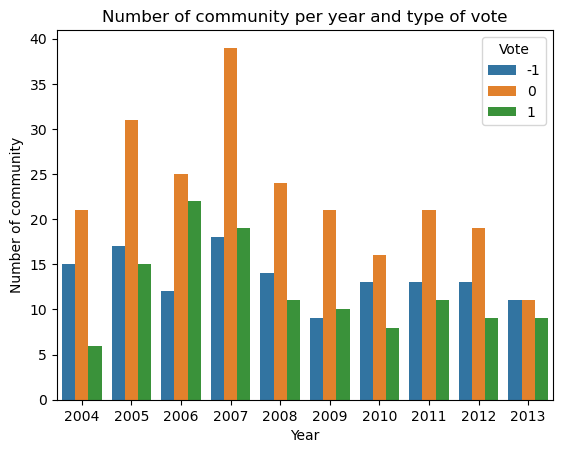

In [113]:
sns.barplot(data=df_community[['Year', 'Vote', 'Total nbr of community']], x='Year', y='Total nbr of community', hue='Vote')

plt.title('Number of community per year and type of vote')
plt.xlabel('Year')
plt.ylabel('Number of community')

## Leiden algorithm

In [3]:
def extract_community_leiden(df, year, vote):
    #Data, Year, type of vote (-1,0,1) for negative, positive or neutral respectively required
    df_year=df[df['Year']==year]
    df_year_vote=df_year[df_year['Vote']==vote]
    df_year_vote=df_year_vote[['Source', 'Target']]

    #create the network
    G=nx.from_pandas_edgelist(df_year_vote, source='Source', target='Target')
    #convert into ig
    H=ig.Graph.from_networkx(G)

    #extract communities with Leiden algorithm 
    partition = la.find_partition(H, la.ModularityVertexPartition)
    
    return partition

In [4]:
def compute_partition_features(partition):
    #gives the number of community we have
    nbr_community=np.max(partition.membership)
    ind_community_size=[]
    for i in range (nbr_community):
        #gives the size of community i+1
        nbr=sum(partition.membership==np.full_like(partition.membership, fill_value=i+1)) 
        ind_community_size.append(nbr)
    return nbr_community, ind_community_size


In [5]:
#create the dataframe
columns_ = ['Year', 'Vote', 'Total nbr of community', 'Size of each community']
df_community_leiden=pd.DataFrame(columns=columns_)

years=df['Year'].unique()
for n, year in enumerate(years):
    partition_pos=extract_community_leiden(df, year,1)
    features_pos=compute_partition_features(partition_pos)
    df_community_leiden.loc[3*n]=[year, 1, features_pos[0], features_pos[1]]

    partition_neg=extract_community_leiden(df, year,-1)
    features_neg=compute_partition_features(partition_neg)
    df_community_leiden.loc[3*n+1]=[year, -1, features_neg[0], features_neg[1]]

    partition_neu=extract_community_leiden(df, year,0)
    features_neu=compute_partition_features(partition_neu)
    df_community_leiden.loc[3*n+2]=[year, 0, features_neu[0], features_neu[1]]

df_community_leiden

,Year,Vote,Total nbr of community,Size of each community
0,2013,1,9,"[94, 92, 82, 79, 76, 75, 69, 22, 3]"
1,2013,-1,10,"[47, 38, 32, 32, 31, 28, 26, 26, 20, 14]"
2,2013,0,10,"[20, 17, 17, 17, 15, 15, 14, 14, 3, 2]"
3,2012,1,7,"[186, 171, 130, 113, 87, 49, 2]"
4,2012,-1,12,"[51, 51, 50, 47, 44, 44, 40, 37, 35, 34, 33, 32]"
5,2012,0,16,"[31, 29, 28, 26, 21, 18, 17, 15, 13, 11, 7, 3,..."
6,2011,1,8,"[203, 166, 151, 139, 137, 107, 2, 1]"
7,2011,-1,14,"[61, 58, 57, 56, 54, 49, 38, 35, 34, 31, 31, 2..."
8,2011,0,18,"[27, 25, 23, 23, 22, 22, 22, 21, 19, 17, 17, 9..."
9,2010,1,5,"[315, 307, 254, 239, 2]"


Text(0, 0.5, 'Number of community')

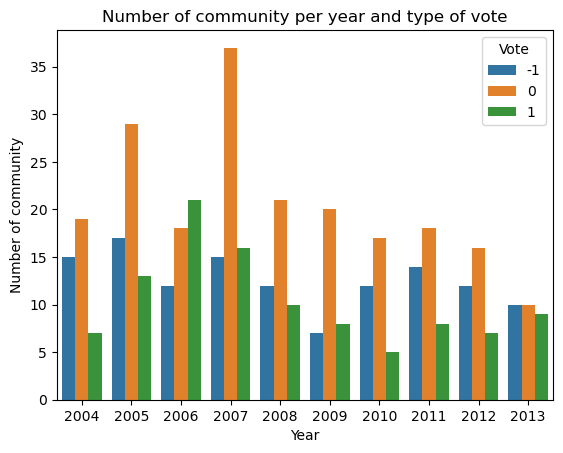

In [6]:
sns.barplot(data=df_community_leiden[['Year', 'Vote', 'Total nbr of community']], x='Year', y='Total nbr of community', hue='Vote')

plt.title('Number of community per year and type of vote')
plt.xlabel('Year')
plt.ylabel('Number of community')

# Community comparison (from Leiden algo)
La community analysis est basée sur les noeuds du graph, donc qui comprend les sources et les targets. Les communautés créés comprennnent donc des targets ce qui est génant dans les analyses qu'on veut faire. Faire un graph dirigé n'aide pas à ne pas avoir de target dans les communautés mais on en obtient des différentes qui font peut être plus sens.
Redefinir la façon dont on fait le graph, c'est à dire relier les sources entre elle qui votent de la même façon pour une même target = trop compliqué (bcp trop de noeuds).
Création de communauté ne semble donc pas très approprié

In [60]:
def extract_community_leiden1(df, year, vote):
    #Data, Year, type of vote (-1,0,1) for negative, positive or neutral respectively required
    df_year=df[df['Year']==year]
    df_year_vote=df_year[df_year['Vote']==vote]
    df_year_vote=df_year_vote[['Source', 'Target']]

    #create the network
    #print('len of vote 1 for all sources', len(df_year_vote))
    G=nx.from_pandas_edgelist(df_year_vote, source='Source', target='Target')
    print(type(G))
    print(G.nodes())
    #convert into ig
    H=ig.Graph.from_networkx(G)

    print(len(G.nodes()), len(G.edges()))
    print(len(H.vs.indices))

    #extract communities with Leiden algorithm 
    partition = la.find_partition(H, la.ModularityVertexPartition)
    print(len(partition.membership))
    return list(G), partition

Extrait les communautés pour une seule année et les votes positifs

In [68]:
year = 2006
partition_pos=extract_community_leiden1(df, year,1)
features_pos=compute_partition_features(partition_pos[1])

"""partition_neg=extract_community_leiden(df, year,-1)
features_neg=compute_partition_features(partition_neg)

partition_neu=extract_community_leiden(df, year,0)
features_neu=compute_partition_features(partition_neu)"""

df_pos_community = pd.DataFrame(columns=['Person', 'Community'])
df_pos_community['Person']=partition_pos[0]
df_pos_community['Community']=partition_pos[1].membership

groupes_sources = df_pos_community.groupby('Community')['Person'].agg(list).reset_index()
groupes_sources


<class 'networkx.classes.graph.Graph'>
['Dbiv', '(aeropagitica)', 'King of Hearts', 'Blnguyen', 'Zsinj', 'Kuru', 'Waggers', 'Johnleemk', 'Siva1979', 'Essexmutant', 'Stifle', 'Sj', 'Lbbzman', 'freakofnurture', 'Samir grover', 'Juppiter', 'Searchme', 'Terenceong1992', 'Haza-w', 'Colin Kimbrell', 'Gflores', 'Cymsdale', 'NSLE', 'Jusjih', 'BD2412', 'Ohnoitsjamie', 'Aranda56', 'Flowerparty', 'Kingboyk', 'CrypticBacon', 'Kefalonia', 'Mjal', 'Mailer diablo', 'Prodego', 'NoSeptember', 'Krash', 'Raven4x4x', 'Rogerd', 'JIP', nan, 'Master Jay', 'Lar', 'Aaron Brenneman', 'Titoxd', 'Sarge Baldy', 'Sean Black', 'SlimVirgin', 'Pilatus', 'Duk', 'Freakofnurture', 'Howcheng', 'El C', 'Sjakkalle', 'Cryptic', 'Dmcdevit', 'Doc glasgow', 'Adrian Buehlmann', 'Mushroom', 'Babajobu', 'Cleared as filed', 'Geogre', 'Hamster Sandwich', 'MarkGallagher', 'Dr Debug', 'Nandesuka', 'Kim Bruning', 'Hahnchen', 'Quarl', 'Mindspillage', 'Anonymous editor', 'Christopher Parham', 'Alphax', 'Xoloz', 'Kusonaga', 'Karmafist', '

,Community,Person
0,0,"[Dbiv, Kuru, Waggers, Johnleemk, Essexmutant, ..."
1,1,"[(aeropagitica), Zsinj, Lbbzman, CrypticBacon,..."
2,2,"[King of Hearts, Blnguyen, Siva1979, Searchme,..."
3,3,"[Nae'blis, Radiant!, Starblind, Pascal.Tesson,..."
4,4,"[Sean Black, Dmcdevit, Kim Bruning, Phaedriel,..."
5,5,"[Alex Bakharev, Eupator, ScottDavis, Zscout370..."
6,6,"[Hex, DrHydeous, EngineerScotty, Subversive el..."
7,7,"[Manojlo, Bormalagurski, Jovanvb, Vladaig, Mil..."
8,8,"[Stilgar135, Xrblsnggt, TruthbringerToronto, R..."
9,9,"[Crisspy, The mann hu new 2 much, Armando341, ..."


Compte le nombre de source dans une communauté précise

In [84]:
source = list(df['Source'])
person = groupes_sources['Person'][2]
match = set(source) & set(person)
nbr_match = len(match)
nbr_match, len(person)

(716, 752)

### Graph dirigé

In [85]:
def extract_community_leiden2(df, year, vote):
    #Data, Year, type of vote (-1,0,1) for negative, positive or neutral respectively required
    df_year=df[df['Year']==year]
    df_year_vote=df_year[df_year['Vote']==vote]
    df_year_vote=df_year_vote[['Source', 'Target']]

    #create the network
    #print('len of vote 1 for all sources', len(df_year_vote))
    G=nx.from_pandas_edgelist(df_year_vote, source='Source', target='Target', create_using=nx.DiGraph())
    print(type(G))
    print(G.nodes())
    #convert into ig
    H=ig.Graph.from_networkx(G)

    print(len(G.nodes()), len(G.edges()))
    print(len(H.vs.indices))

    #extract communities with Leiden algorithm 
    partition = la.find_partition(H, la.ModularityVertexPartition)
    print(len(partition.membership))
    return list(G), partition

In [86]:
year = 2006
partition_pos2=extract_community_leiden2(df, year,1)
features_pos2=compute_partition_features(partition_pos2[1])

"""partition_neg=extract_community_leiden(df, year,-1)
features_neg=compute_partition_features(partition_neg)

partition_neu=extract_community_leiden(df, year,0)
features_neu=compute_partition_features(partition_neu)"""

df_pos_community2 = pd.DataFrame(columns=['Person', 'Community'])
df_pos_community2['Person']=partition_pos2[0]
df_pos_community2['Community']=partition_pos2[1].membership

groupes_sources2 = df_pos_community2.groupby('Community')['Person'].agg(list).reset_index()
groupes_sources2


<class 'networkx.classes.digraph.DiGraph'>
['Dbiv', '(aeropagitica)', 'King of Hearts', 'Blnguyen', 'Zsinj', 'Kuru', 'Waggers', 'Johnleemk', 'Siva1979', 'Essexmutant', 'Stifle', 'Sj', 'Lbbzman', 'freakofnurture', 'Samir grover', 'Juppiter', 'Searchme', 'Terenceong1992', 'Haza-w', 'Colin Kimbrell', 'Gflores', 'Cymsdale', 'NSLE', 'Jusjih', 'BD2412', 'Ohnoitsjamie', 'Aranda56', 'Flowerparty', 'Kingboyk', 'CrypticBacon', 'Kefalonia', 'Mjal', 'Mailer diablo', 'Prodego', 'NoSeptember', 'Krash', 'Raven4x4x', 'Rogerd', 'JIP', nan, 'Master Jay', 'Lar', 'Aaron Brenneman', 'Titoxd', 'Sarge Baldy', 'Sean Black', 'SlimVirgin', 'Pilatus', 'Duk', 'Freakofnurture', 'Howcheng', 'El C', 'Sjakkalle', 'Cryptic', 'Dmcdevit', 'Doc glasgow', 'Adrian Buehlmann', 'Mushroom', 'Babajobu', 'Cleared as filed', 'Geogre', 'Hamster Sandwich', 'MarkGallagher', 'Dr Debug', 'Nandesuka', 'Kim Bruning', 'Hahnchen', 'Quarl', 'Mindspillage', 'Anonymous editor', 'Christopher Parham', 'Alphax', 'Xoloz', 'Kusonaga', 'Karmafist

,Community,Person
0,0,"[(aeropagitica), CrypticBacon, Mailer diablo, ..."
1,1,"[Dbiv, Kuru, Waggers, Johnleemk, Essexmutant, ..."
2,2,"[King of Hearts, Blnguyen, Siva1979, Searchme,..."
3,3,"[Zsinj, Lbbzman, Sean Black, Dmcdevit, Kim Bru..."
4,4,"[Alex Bakharev, Eupator, ScottDavis, pfctdayel..."
5,5,"[Emx, Kseferovic, HarisM, Sirmelle, Kahriman, ..."
6,6,"[Tintin1107, Ragib, Sundar, AreJay, Viriditas,..."
7,7,"[Manojlo, Bormalagurski, Jovanvb, Vladaig, Mil..."
8,8,"[Hosedeck, joeferret, Joeferret]"
9,9,"[Gordon39, mlc409, Ichbinbored]"


Compare le nombre de source dans chaque communauté avec un graph non dirigé et dirigé

In [91]:
source = list(df['Source'])
nbr=4
person1=groupes_sources['Person'][nbr]
match1 = set(source) & set(person1)
nbr_match1 = len(match1)

person2 = groupes_sources2['Person'][nbr]
match2 = set(source) & set(person2)
nbr_match2 = len(match2)

(nbr_match1, len(person1)), (nbr_match2, len(person2))

((136, 138), (57, 58))